genera bati .grd de archivo.mat

In [14]:
from scipy.io import loadmat
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from xyztools import xyz2grid, xyz2grd
import os

In [15]:
#archivo .mat
mat_file=r"G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Batimetrias\bat_IV_region\bat_l2_iv_region_3sa.mat"
mat_data = loadmat(mat_file) #carga archivo .mat

In [16]:
# ver contenidos (key) del archivo .mat
#por ejemplo para cargar variable 'bat': mat_data['bat']
for key in mat_data.keys():
    print(key,'\t',mat_data[key])

__header__ 	 b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Aug 17 14:53:12 2018'
__version__ 	 1.0
__globals__ 	 []
bat 	 [[ 287.5         -28.90208244 5365.33203125]
 [ 287.5         -28.90291578 5366.02407091]
 [ 287.5         -28.90374911 5366.71611058]
 ...
 [ 289.          -32.45458244 -258.06114659]
 [ 289.          -32.45541578 -259.19678457]
 [ 289.          -32.45624911 -260.33242254]]


In [17]:
#separa en vectores x,y,z
x=mat_data['bat'][:,0]
y=mat_data['bat'][:,1]
z=mat_data['bat'][:,2]

<xarray.Dataset>
Dimensions:  (x: 1801, y: 4266)
Coordinates:
  * x        (x) float64 287.5 287.5 287.5 287.5 ... 289.0 289.0 289.0 289.0
  * y        (y) float64 -28.9 -28.9 -28.9 -28.9 ... -32.45 -32.45 -32.46 -32.46
Data variables:
    z        (y, x) float64 -5.365e+03 -5.37e+03 -5.374e+03 ... 260.8 260.3


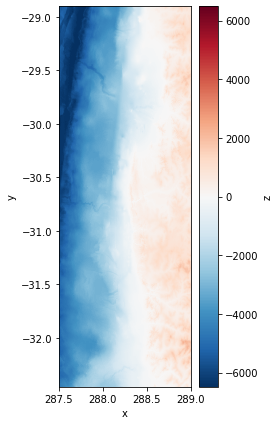

In [18]:
#genera dataset
grd=xyz2grd(x,y,-z)

print(grd)
grd.z.plot.imshow(aspect=grd.dims['x'] / grd.dims['y'],size=7)

In [19]:
# guarda archivo grd
savedir=r'G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Batimetrias\bat_IV_region'

savename=os.path.splitext(os.path.basename(mat_file))[0] #nombre de archivo es el mismo que el archivo mat original
grd.to_netcdf(os.path.join(savedir,savename+'.grd'),format='NETCDF3_CLASSIC') #guarda el arvhivo con formato grd